In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time

import datetime
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams['axes.facecolor'] = 'dimgrey'
#plt.rcParams['axes.facecolor'] = 'black'

In [2]:
team_1 = "manchester-united"
team_2 = "liverpool-fc"
team_3 = "arsenal-fc"
team_4 = "chelsea-fc"
team_5 = "manchester-city"
team_6 = "tottenham-hotspur"

In [3]:
def DataFilter(df1):
    df = df1.copy(deep=True)
    df['Vic'] = np.NAN
    df['GF'] = np.NAN
    df['GA'] = np.NAN
    df['GD'] = np.NAN
    df['ExpGf'] = np.NAN
    df['ExpGa'] = np.NAN
    df['ExpGd'] = np.NAN
    df['ExpPPM'] = np.NAN
    df['ExpRate'] = np.NAN
    for i in xrange(len(df)):
        tmp = df.score[i]
        if tmp[2] == ":":
            print tmp
            tmp = "2:2"     
        #chapter_2.GF[i] = int(tmp[0])
        df.loc[i, 'GF'] = int(tmp[0])
        df.loc[i, 'GA'] = int(tmp[2])
        df.loc[i, 'GD'] = int(tmp[0]) - int(tmp[2])
        df.loc[i, 'Vic'] = float((tmp[0] > tmp[2]))
    df['ExpGf'] = df.GF.cumsum()
    df['ExpGa'] = df.GA.cumsum()
    df['ExpGd'] = df.GD.cumsum()
    df['ExpPPM'] = df.points.cumsum()
    df['ExpRate'] = df.Vic.cumsum()
    for i in xrange(len(df)):
        df.loc[i, 'ExpGf'] = df['ExpGf'][i] / (i+1)
        df.loc[i, 'ExpGa'] = df['ExpGa'][i] / (i+1)
        df.loc[i, 'ExpGd'] = df['ExpGd'][i] / (i+1)
        df.loc[i, 'ExpPPM'] = df['ExpPPM'][i] / (i+1)
        df.loc[i, 'ExpRate'] = df['ExpRate'][i] / (i+1)

    return df

def load_data(df_list):
    print "start",
    df = pd.concat(df_list, ignore_index=True)
    df.date = pd.to_datetime(df.date, dayfirst=True)
    df = df.sort_values(by='date')
    mask = df.match_type.str.startswith('Premier League', na=False)
    df = df.loc[mask]
    df = df.reset_index(drop=True)
    df = DataFilter(df)
    print "end"
    return df

In [4]:
start_1 = pd.to_datetime('5/1/1996') #Wenger In
start_2 = pd.to_datetime('6/1/2003') #阿布
start_3 = pd.to_datetime('7/1/2004') #Big4 starts
start_4 = pd.to_datetime('9/1/2008') #Abu Dhabi
end_1 = pd.to_datetime('5/1/2009') # Big4 ends
end_2 = pd.to_datetime('12/17/2015')

teams = ["manchester-united", "liverpool-fc", "arsenal-fc", "chelsea-fc", 
         "manchester-city", "tottenham-hotspur", "everton-fc"]


In [11]:
dfs =[[], [], [], [], [], [], []]


pre = './data/'

for i in range(7):
    for j in range(10):
        add = pre+teams[i]+'/'+teams[i]+'_'+str(2008+j)+'_'+str(2009+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs[i].append(df_cache)

teams_data = [load_data(dfs[i]) for i in range(7)]
print len(teams_data[0]), len(teams_data[1]), len(teams_data[6])



start end
start end
start end
start end
start end
start end
start end
376 377 379


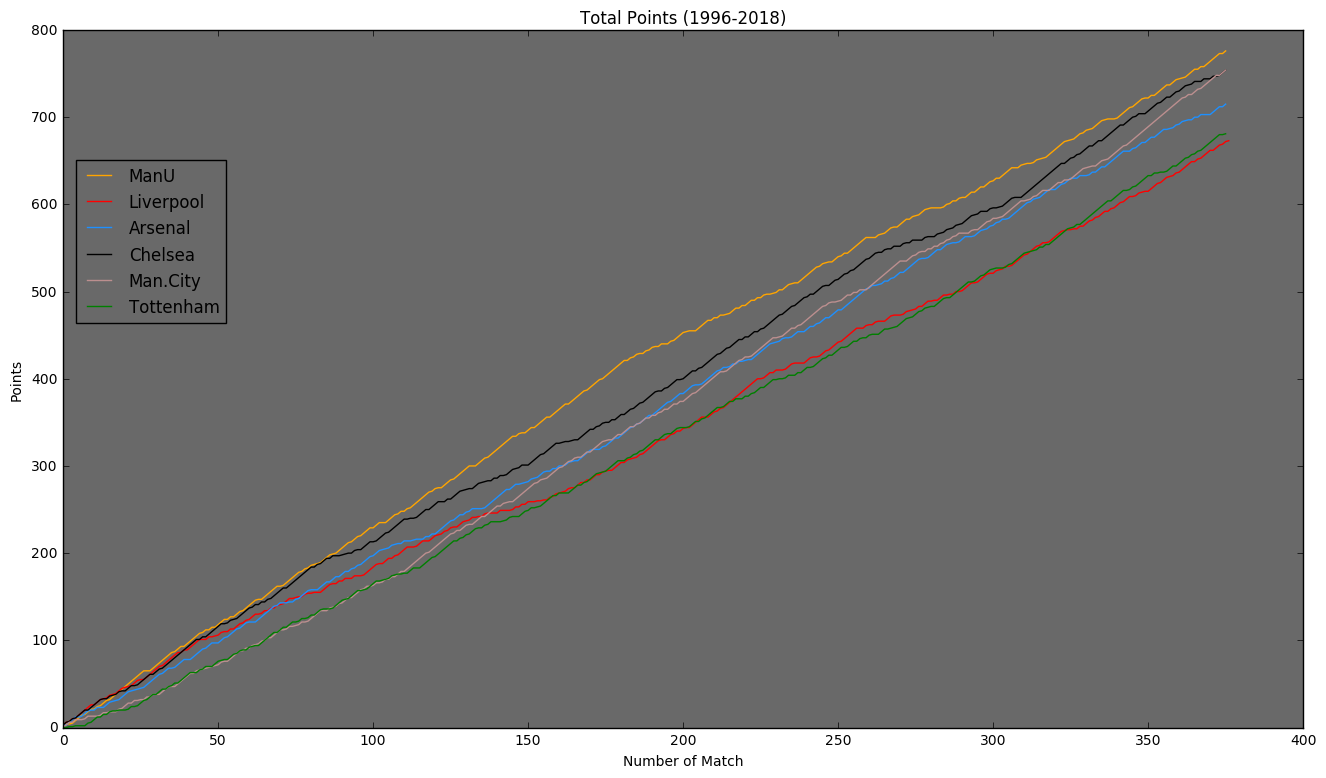

In [14]:
metrics = [[], [], [], [], [], [], [], []]

for i in range(6):
    metrics[i].append(teams_data[i].points.cumsum())
    metrics[i].append(teams_data[i].GF.cumsum())
    metrics[i].append(teams_data[i].GA.cumsum())

plt.rcParams["figure.figsize"] = [16,9]
colors = ['orange', 'red', 'dodgerblue', 'k', 'rosybrown', 'green', 'yellow', 'purple']
for i in range(6):
    plt.plot(teams_data[i].index, metrics[i][0], color=colors[i])

#plt.xlim([0,810])
#plt.ylim([0, 1700])
plt.title('Total Points (1996-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('ManU', 'Liverpool', 'Arsenal', 'Chelsea', 'Man.City', 'Tottenham', 'Everton'), shadow=False, loc=(0.01, 0.58))
plt.show()

teams = ["manchester-united", "liverpool-fc", "arsenal-fc", "chelsea-fc", 
         "manchester-city", "tottenham-hotspur", "everton-fc"]


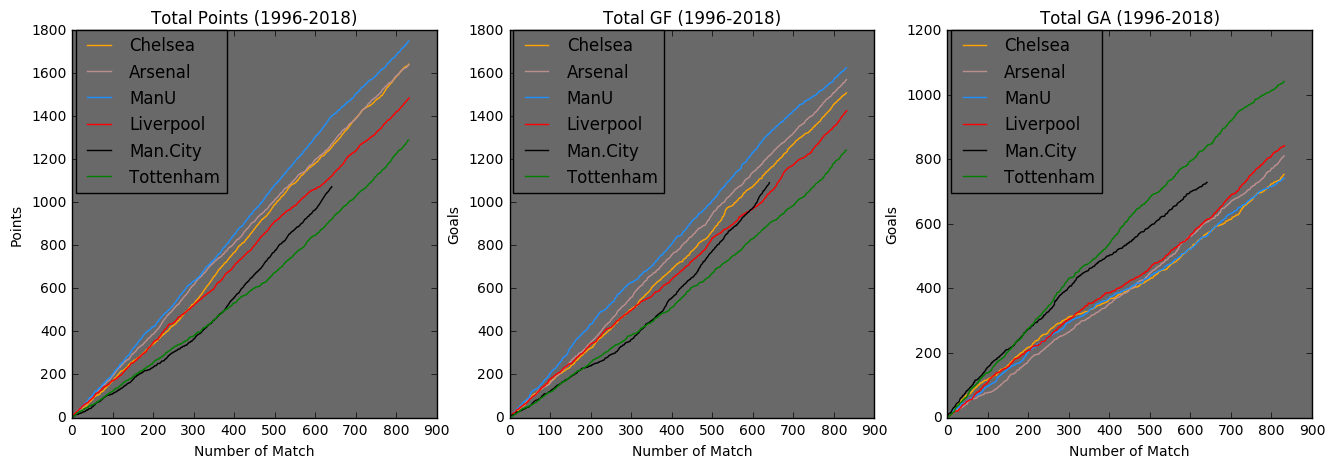

In [10]:
plt.rcParams["figure.figsize"] = [16,5]

plt.subplot(131)

plt.plot(chelsea_raw.index, chelsea_metrics[0], 'orange')
plt.plot(arsenal_raw.index, arsenal_metrics[0], color='rosybrown')
plt.plot(manchesterunited_raw.index, manu_metrics[0], 'dodgerblue')
plt.plot(liverpool_raw.index, liv_metrics[0], 'r')
plt.plot(manchestercity_raw.index, city_metrics[0], 'k')
plt.plot(tottenham_raw.index, tot_metrics[0], 'green')
#plt.xlim([0,310])
plt.title('Total Points (1996-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('Chelsea', 'Arsenal', 'ManU', 'Liverpool', 'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.58))

plt.subplot(132)

plt.plot(chelsea_raw.index, chelsea_metrics[1], 'orange')
plt.plot(arsenal_raw.index, arsenal_metrics[1], color='rosybrown')
plt.plot(manchesterunited_raw.index, manu_metrics[1], 'dodgerblue')
plt.plot(liverpool_raw.index, liv_metrics[1], 'r')
plt.plot(manchestercity_raw.index, city_metrics[1], 'k')
plt.plot(tottenham_raw.index, tot_metrics[1], 'green')
#plt.xlim([0,310])
plt.title('Total GF (1996-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Chelsea', 'Arsenal', 'ManU', 'Liverpool', 'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.58))

plt.subplot(133)

plt.plot(chelsea_raw.index, chelsea_metrics[2], 'orange')
plt.plot(arsenal_raw.index, arsenal_metrics[2], color='rosybrown')
plt.plot(manchesterunited_raw.index, manu_metrics[2], 'dodgerblue')
plt.plot(liverpool_raw.index, liv_metrics[2], 'r')
plt.plot(manchestercity_raw.index, city_metrics[2], 'k')
plt.plot(tottenham_raw.index, tot_metrics[2], 'green')
#plt.xlim([0,310])
plt.title('Total GA (1996-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Chelsea', 'Arsenal', 'ManU', 'Liverpool', 'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.58))




plt.show()

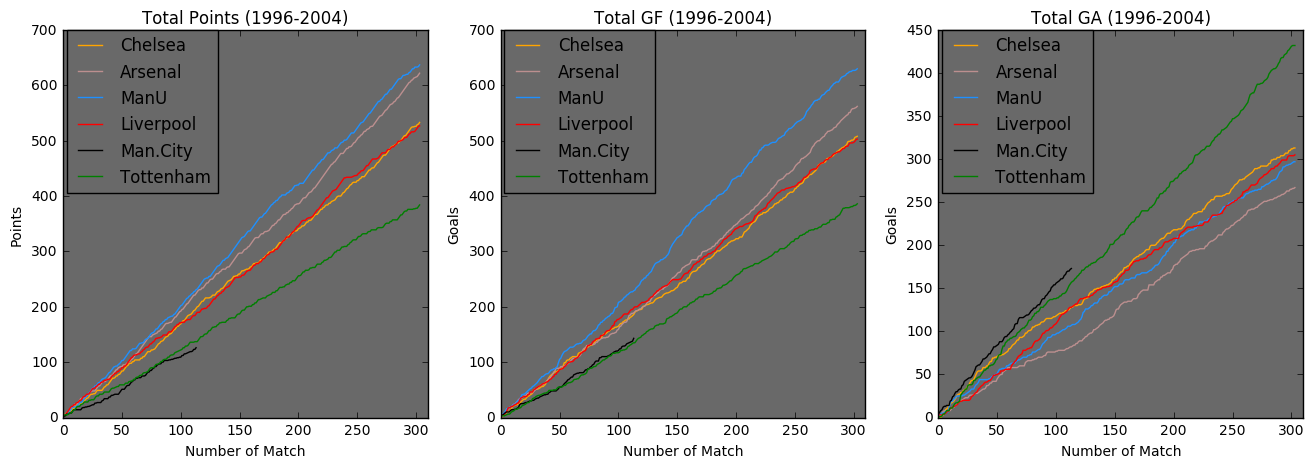

In [13]:
plt.rcParams["figure.figsize"] = [16,5]

mask = (chelsea_raw.date <= start_3) 
chelsea_raw = chelsea_raw.loc[mask]
chelsea_raw = chelsea_raw.reset_index(drop=True)
mask = (manchestercity_raw.date <= start_3) 
manchestercity_raw = manchestercity_raw.loc[mask]
manchestercity_raw = manchestercity_raw.reset_index(drop=True)
mask = (manchesterunited_raw.date <= start_3) 
manchesterunited_raw = manchesterunited_raw.loc[mask]
manchesterunited_raw = manchesterunited_raw.reset_index(drop=True)
mask = (liverpool_raw.date <= start_3) 
liverpool_raw = liverpool_raw.loc[mask]
liverpool_raw = liverpool_raw.reset_index(drop=True)
mask = (arsenal_raw.date <= start_3) 
arsenal_raw = arsenal_raw.loc[mask]
arsenal_raw = arsenal_raw.reset_index(drop=True)
mask = (tottenham_raw.date <= start_3) 
tottenham_raw = tottenham_raw.loc[mask]
tottenham_raw = tottenham_raw.reset_index(drop=True)


chelsea_metric1 = chelsea_raw.points.cumsum()
arsenal_metric1 = arsenal_raw.points.cumsum()
manu_metric1 = manchesterunited_raw.points.cumsum()
liv_metric1 = liverpool_raw.points.cumsum()
tot_metric1 = tottenham_raw.points.cumsum()
city_metric1 = manchestercity_raw.points.cumsum()

chelsea_metric2 = chelsea_raw.GA.cumsum()
arsenal_metric2 = arsenal_raw.GA.cumsum()
manu_metric2 = manchesterunited_raw.GA.cumsum()
liv_metric2 = liverpool_raw.GA.cumsum()
tot_metric2 = tottenham_raw.GA.cumsum()
city_metric2 = manchestercity_raw.GA.cumsum()

chelsea_metric3 = chelsea_raw.GF.cumsum()
arsenal_metric3 = arsenal_raw.GF.cumsum()
manu_metric3 = manchesterunited_raw.GF.cumsum()
liv_metric3 = liverpool_raw.GF.cumsum()
tot_metric3 = tottenham_raw.GF.cumsum()
city_metric3 = manchestercity_raw.GF.cumsum()


plt.subplot(131)

plt.plot(chelsea_raw.index, chelsea_metric1, 'orange')
plt.plot(arsenal_raw.index, arsenal_metric1, color='rosybrown')
plt.plot(manchesterunited_raw.index, manu_metric1, 'dodgerblue')
plt.plot(liverpool_raw.index, liv_metric1, 'r')
plt.plot(manchestercity_raw.index, city_metric1, 'k')
plt.plot(tottenham_raw.index, tot_metric1, 'green')
plt.xlim([0,310])
plt.title('Total Points (1996-2004)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('Chelsea', 'Arsenal', 'ManU', 'Liverpool', 'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.58))

plt.subplot(132)
plt.plot(chelsea_raw.index, chelsea_metric3, 'orange')
plt.plot(arsenal_raw.index, arsenal_metric3, color='rosybrown')
plt.plot(manchesterunited_raw.index, manu_metric3, 'dodgerblue')
plt.plot(liverpool_raw.index, liv_metric3, 'r')
plt.plot(manchestercity_raw.index, city_metric3, 'k')
plt.plot(tottenham_raw.index, tot_metric3, 'green')
plt.xlim([0,310])
plt.title('Total GF (1996-2004)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Chelsea', 'Arsenal', 'ManU', 'Liverpool', 'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.58))



plt.subplot(133)

plt.plot(chelsea_raw.index, chelsea_metric2, 'orange')
plt.plot(arsenal_raw.index, arsenal_metric2, color='rosybrown')
plt.plot(manchesterunited_raw.index, manu_metric2, 'dodgerblue')
plt.plot(liverpool_raw.index, liv_metric2, 'r')
plt.plot(manchestercity_raw.index, city_metric2, 'k')
plt.plot(tottenham_raw.index, tot_metric2, 'green')
plt.xlim([0,310])
plt.title('Total GA (1996-2004)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Chelsea', 'Arsenal', 'ManU', 'Liverpool', 'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.58))




plt.show()

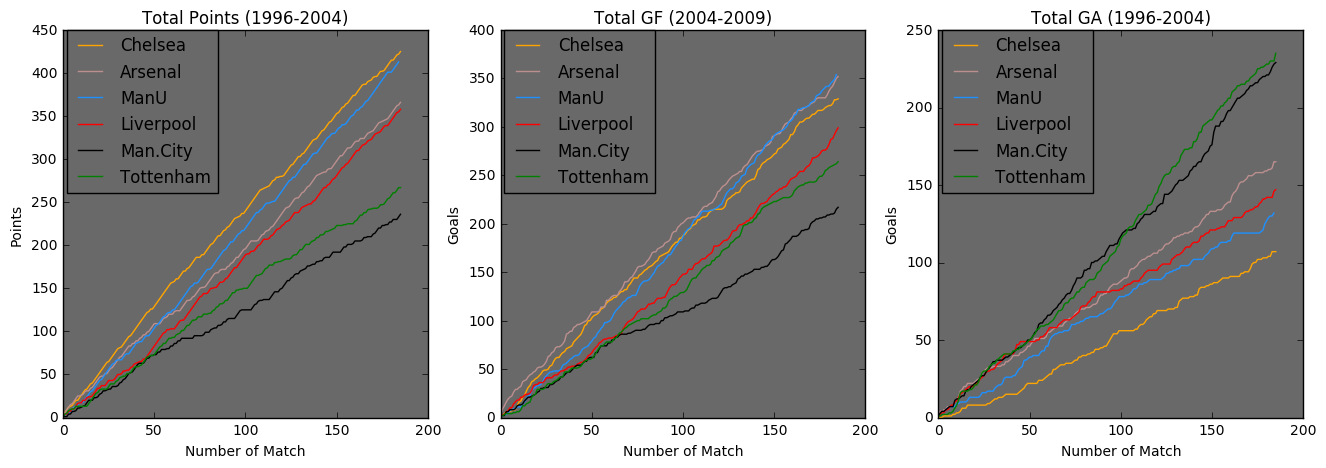

In [15]:
plt.rcParams["figure.figsize"] = [16,5]

mask = (chelsea_raw.date >= start_3) & (chelsea_raw.date <= end_1)
chelsea_raw = chelsea_raw.loc[mask]
chelsea_raw = chelsea_raw.reset_index(drop=True)
mask = (manchestercity_raw.date >= start_3) & (manchestercity_raw.date <= end_1)
manchestercity_raw = manchestercity_raw.loc[mask]
manchestercity_raw = manchestercity_raw.reset_index(drop=True)
mask = (manchesterunited_raw.date >= start_3) & (manchesterunited_raw.date <= end_1)
manchesterunited_raw = manchesterunited_raw.loc[mask]
manchesterunited_raw = manchesterunited_raw.reset_index(drop=True)
mask = (liverpool_raw.date >= start_3) & (liverpool_raw.date <= end_1)
liverpool_raw = liverpool_raw.loc[mask]
liverpool_raw = liverpool_raw.reset_index(drop=True)
mask = (arsenal_raw.date >= start_3) & (arsenal_raw.date <= end_1)
arsenal_raw = arsenal_raw.loc[mask]
arsenal_raw = arsenal_raw.reset_index(drop=True)
mask = (tottenham_raw.date >= start_3) & (tottenham_raw.date <= end_1)
tottenham_raw = tottenham_raw.loc[mask]
tottenham_raw = tottenham_raw.reset_index(drop=True)


chelsea_metric1 = chelsea_raw.points.cumsum()
arsenal_metric1 = arsenal_raw.points.cumsum()
manu_metric1 = manchesterunited_raw.points.cumsum()
liv_metric1 = liverpool_raw.points.cumsum()
tot_metric1 = tottenham_raw.points.cumsum()
city_metric1 = manchestercity_raw.points.cumsum()

chelsea_metric2 = chelsea_raw.GA.cumsum()
arsenal_metric2 = arsenal_raw.GA.cumsum()
manu_metric2 = manchesterunited_raw.GA.cumsum()
liv_metric2 = liverpool_raw.GA.cumsum()
tot_metric2 = tottenham_raw.GA.cumsum()
city_metric2 = manchestercity_raw.GA.cumsum()

chelsea_metric3 = chelsea_raw.GF.cumsum()
arsenal_metric3 = arsenal_raw.GF.cumsum()
manu_metric3 = manchesterunited_raw.GF.cumsum()
liv_metric3 = liverpool_raw.GF.cumsum()
tot_metric3 = tottenham_raw.GF.cumsum()
city_metric3 = manchestercity_raw.GF.cumsum()


plt.subplot(131)

plt.plot(chelsea_raw.index, chelsea_metric1, 'orange')
plt.plot(arsenal_raw.index, arsenal_metric1, color='rosybrown')
plt.plot(manchesterunited_raw.index, manu_metric1, 'dodgerblue')
plt.plot(liverpool_raw.index, liv_metric1, 'r')
plt.plot(manchestercity_raw.index, city_metric1, 'k')
plt.plot(tottenham_raw.index, tot_metric1, 'green')
plt.xlim([0,200])
plt.title('Total Points (1996-2004)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('Chelsea', 'Arsenal', 'ManU', 'Liverpool', 'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.58))

plt.subplot(132)
plt.plot(chelsea_raw.index, chelsea_metric3, 'orange')
plt.plot(arsenal_raw.index, arsenal_metric3, color='rosybrown')
plt.plot(manchesterunited_raw.index, manu_metric3, 'dodgerblue')
plt.plot(liverpool_raw.index, liv_metric3, 'r')
plt.plot(manchestercity_raw.index, city_metric3, 'k')
plt.plot(tottenham_raw.index, tot_metric3, 'green')
plt.xlim([0,200])
plt.title('Total GF (2004-2009)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Chelsea', 'Arsenal', 'ManU', 'Liverpool', 'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.58))



plt.subplot(133)
plt.plot(chelsea_raw.index, chelsea_metric2, 'orange')
plt.plot(arsenal_raw.index, arsenal_metric2, color='rosybrown')
plt.plot(manchesterunited_raw.index, manu_metric2, 'dodgerblue')
plt.plot(liverpool_raw.index, liv_metric2, 'r')
plt.plot(manchestercity_raw.index, city_metric2, 'k')
plt.plot(tottenham_raw.index, tot_metric2, 'green')
plt.xlim([0,200])
plt.title('Total GA (1996-2004)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Chelsea', 'Arsenal', 'ManU', 'Liverpool', 'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.58))




plt.show()

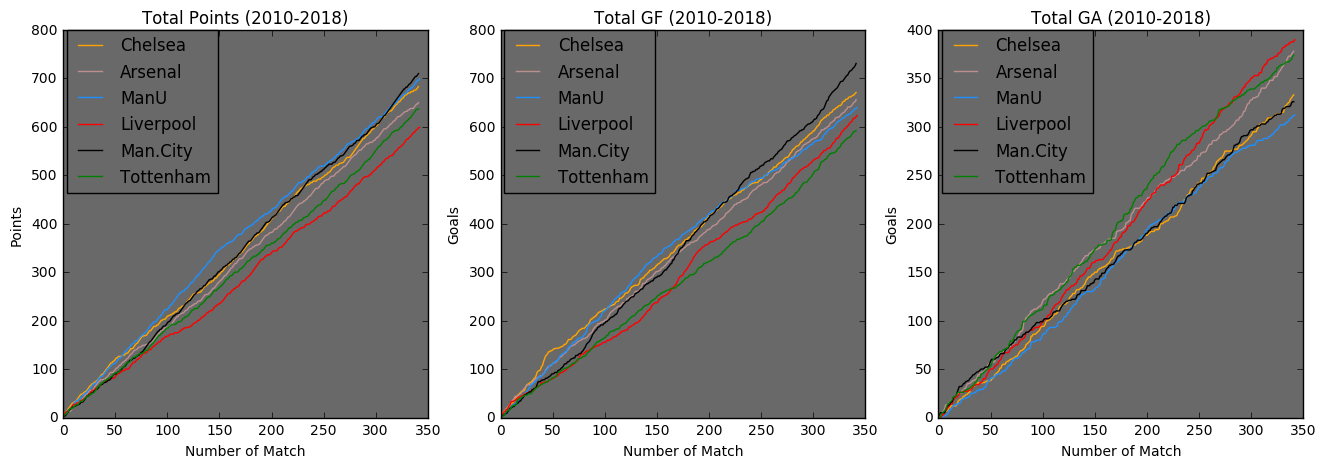

In [17]:
mask = (chelsea_raw.date >= end_1) 
chelsea_raw = chelsea_raw.loc[mask]
chelsea_raw = chelsea_raw.reset_index(drop=True)
mask = (manchestercity_raw.date >= end_1) 
manchestercity_raw = manchestercity_raw.loc[mask]
manchestercity_raw = manchestercity_raw.reset_index(drop=True)
mask = (manchesterunited_raw.date >= end_1) 
manchesterunited_raw = manchesterunited_raw.loc[mask]
manchesterunited_raw = manchesterunited_raw.reset_index(drop=True)
mask = (liverpool_raw.date >= end_1) 
liverpool_raw = liverpool_raw.loc[mask]
liverpool_raw = liverpool_raw.reset_index(drop=True)
mask = (arsenal_raw.date >= end_1) 
arsenal_raw = arsenal_raw.loc[mask]
arsenal_raw = arsenal_raw.reset_index(drop=True)
mask = (tottenham_raw.date >= end_1) 
tottenham_raw = tottenham_raw.loc[mask]
tottenham_raw = tottenham_raw.reset_index(drop=True)

chelsea_metric1 = chelsea_raw.points.cumsum()
arsenal_metric1 = arsenal_raw.points.cumsum()
manu_metric1 = manchesterunited_raw.points.cumsum()
liv_metric1 = liverpool_raw.points.cumsum()
tot_metric1 = tottenham_raw.points.cumsum()
city_metric1 = manchestercity_raw.points.cumsum()

chelsea_metric2 = chelsea_raw.GA.cumsum()
arsenal_metric2 = arsenal_raw.GA.cumsum()
manu_metric2 = manchesterunited_raw.GA.cumsum()
liv_metric2 = liverpool_raw.GA.cumsum()
tot_metric2 = tottenham_raw.GA.cumsum()
city_metric2 = manchestercity_raw.GA.cumsum()

chelsea_metric3 = chelsea_raw.GF.cumsum()
arsenal_metric3 = arsenal_raw.GF.cumsum()
manu_metric3 = manchesterunited_raw.GF.cumsum()
liv_metric3 = liverpool_raw.GF.cumsum()
tot_metric3 = tottenham_raw.GF.cumsum()
city_metric3 = manchestercity_raw.GF.cumsum()


plt.subplot(131)

plt.plot(chelsea_raw.index, chelsea_metric1, 'orange')
plt.plot(arsenal_raw.index, arsenal_metric1, color='rosybrown')
plt.plot(manchesterunited_raw.index, manu_metric1, 'dodgerblue')
plt.plot(liverpool_raw.index, liv_metric1, 'r')
plt.plot(manchestercity_raw.index, city_metric1, 'k')
plt.plot(tottenham_raw.index, tot_metric1, 'green')
plt.xlim([0,350])
plt.title('Total Points (2010-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('Chelsea', 'Arsenal', 'ManU', 'Liverpool', 'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.58))

plt.subplot(132)

plt.plot(chelsea_raw.index, chelsea_metric3, 'orange')
plt.plot(arsenal_raw.index, arsenal_metric3, color='rosybrown')
plt.plot(manchesterunited_raw.index, manu_metric3, 'dodgerblue')
plt.plot(liverpool_raw.index, liv_metric3, 'r')
plt.plot(manchestercity_raw.index, city_metric3, 'k')
plt.plot(tottenham_raw.index, tot_metric3, 'green')
plt.xlim([0,350])
plt.title('Total GF (2010-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Chelsea', 'Arsenal', 'ManU', 'Liverpool', 'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.58))


plt.subplot(133)


plt.plot(chelsea_raw.index, chelsea_metric2, 'orange')
plt.plot(arsenal_raw.index, arsenal_metric2, color='rosybrown')
plt.plot(manchesterunited_raw.index, manu_metric2, 'dodgerblue')
plt.plot(liverpool_raw.index, liv_metric2, 'r')
plt.plot(manchestercity_raw.index, city_metric2, 'k')
plt.plot(tottenham_raw.index, tot_metric2, 'green')
plt.xlim([0,350])
plt.title('Total GA (2010-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Chelsea', 'Arsenal', 'ManU', 'Liverpool', 'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.58))


plt.show()